# Decision Trees


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


if you uisng you own version comment out


In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import matplotlib.pyplot as plt

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use pandas library to read itdirectly into a dataframe from IBM Object Storage.
</div>


In [4]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using the **LabelEncoder() method**
to convert the categorical variable into dummy/indicator variables.


In [6]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder() #object creation to convert the categorical variable into dummy/indicator variables
le_sex.fit(['F','M']) #model creation
X[:,1] = le_sex.transform(X[:,1]) #model transformation


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.


Unique values: [0 1]
Counts: [ 96 104]


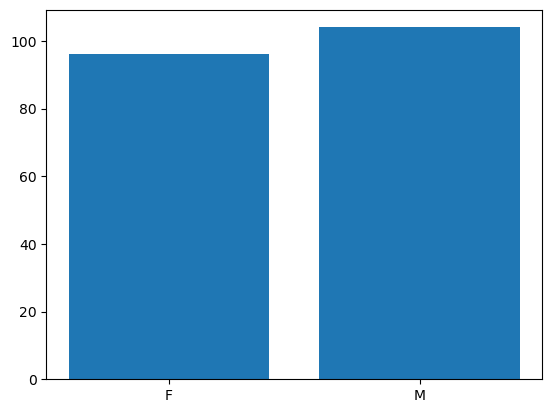

In [7]:
#with numpy array
group_names = ['F', 'M']
unique_values, counts = np.unique(X[:,1], return_counts=True)
plt.bar(group_names, counts)
print("Unique values:", unique_values)
print("Counts:", counts)

<BarContainer object of 3 artists>

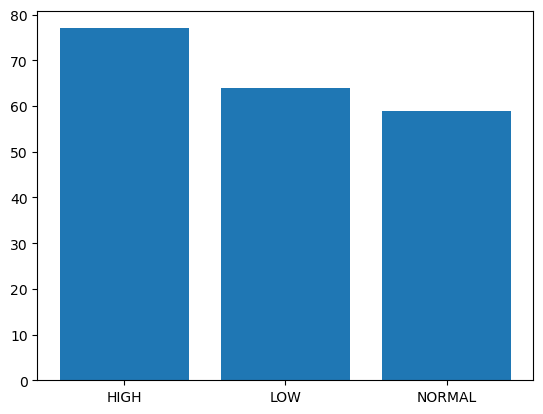

In [8]:
my_data["BP"].unique()
plt.bar(my_data["BP"].unique(), my_data["BP"].value_counts().values)

<BarContainer object of 2 artists>

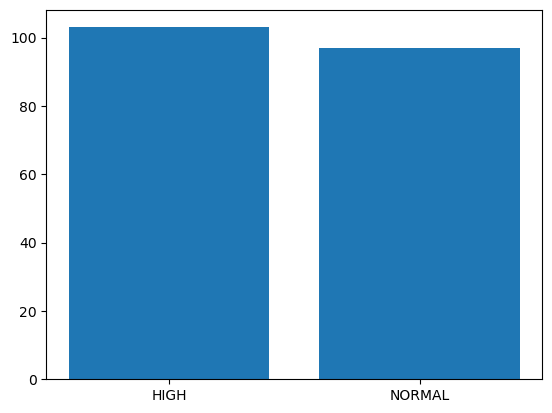

In [9]:
my_data["Cholesterol"].unique()
plt.bar(my_data["Cholesterol"].unique(), my_data["Cholesterol"].value_counts().values)

In [10]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<BarContainer object of 5 artists>

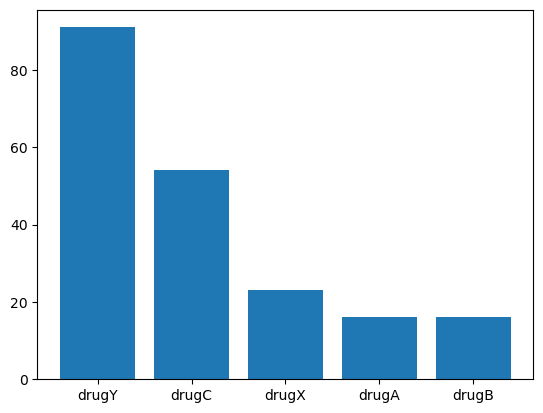

In [11]:
my_data["Drug"].unique()
plt.bar(my_data["Drug"].unique(), my_data["Drug"].value_counts().values)

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [12]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [13]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [14]:
X_trainset.shape

(140, 5)

In [15]:
y_trainset.shape

(140,)

<hr>

<div id="modeling">
    <h2><b>Modeling</b></h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


<div id="DecisionTreeClassifier">
    <h3>DecisionTreeClassifier</h3>
    The DecisionTreeClassifier is a class provided by the sklearn.tree module in the scikit-learn library, which is used for classification tasks. It      implements a decision tree classifier, which is a powerful and versatile machine learning model used for both classification and regression tasks.<br>
    <b>Key Features of DecisionTreeClassifier:</b>
    <ul>
        <li>Interpretability: Decision trees are easy to interpret and visualize, which makes them useful for understanding the model's decision-making process.</li>
         <li>Non-linearity: They can handle non-linear relationships between features and target variables.</li>
         <li>Minimal data preparation: Decision trees don't require scaling of data or extensive preprocessing.</li>
         <li>Handling of different data types: They can work with both numerical and categorical data.</li>
    </ul>
    <b>Important Parameter</b>
    <ul>
        <li><b>criterion</b>: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.DEFAULT:"gini"</li>
         <li><b>splitter</b>: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.DEFAULT:"best"</li>
         <li><b>max_depth</b>: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.DEFAULT:"None"</li>
         <li><b>min_samples_split</b>: The minimum number of samples required to split an internal node.DEFAULT:"2"</li>
         <li><b>min_samples_leaf</b>: The minimum number of samples required to be at a leaf node.DEFAULT:"1"</li>
         <li><b>random_state</b>: The random_state parameter in scikit-learn is used to control the randomness of certain algorithms and processes to ensure reproducibility of results. When you set random_state to a specific integer, you are essentially fixing the seed of the random number generator, which ensures that the same sequence of random numbers is generated each time the code is run. This makes the results deterministic and reproducible, which is crucial for debugging, comparing results, and sharing code.</li>
        <li><b>n_jobs</b>: The n_jobs parameter is a common parameter in many scikit-learn estimators and functions that support parallel processing. It specifies the number of jobs (i.e., CPU cores) to use for computation.This parameter is particularly useful when working with large datasets or performing tasks that can be parallelized, such as fitting a model, cross-validation, or making predictions. </li>
    </ul>
</div>

In [16]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [17]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>
<h3><b>Probabilities</b></h3>

<p>Mean probabilities give you an idea of the model's confidence in its predictions, feature importance scores provide insight into which features are most influential in making those predictions. These are complementary pieces of information:

Mean Probabilities: Help understand the general confidence of the model across different classes.
Feature Importance: Indicates which features contribute most to the decision-making process of the model.
By combining these insights, you can better understand your model's behavior and the role of different features.</p>

In [18]:
probabilities=drugTree.predict_proba(X_trainset)
# Calculate mean probabilities for each class
mean_probabilities = np.mean(probabilities, axis=0)
print("Mean probabilities for each class:", mean_probabilities)

Mean probabilities for each class: [0.11428571 0.07857143 0.07857143 0.23571429 0.49285714]


In [19]:
# Get feature importances
feature_importances = drugTree.feature_importances_
print("Feature importances:", feature_importances)

# Optionally, sort and display feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
print("Features sorted by importance:")
for idx in sorted_indices:
    print(f"Feature {idx}, Importance: {feature_importances[idx]}")


Feature importances: [0.09749785 0.         0.3295848  0.05454991 0.51836744]
Features sorted by importance:
Feature 4, Importance: 0.5183674355996556
Feature 2, Importance: 0.32958480372190085
Feature 0, Importance: 0.09749784755516422
Feature 3, Importance: 0.05454991312327922
Feature 1, Importance: 0.0


<hr>
<div id="Relationship Between Predictive Probability and Entropy">
     <h2>Relationship Between Predictive Probability and Entropy</h2>
 When you notice that features with high probability (i.e., those that strongly influence the target variable) also have high entropy, it might indicate the following:
<ul>
    <li>
       Importance and Variability: Features that are important for predicting the target variable may show high variability, thus having higher entropy. This variability can provide more information about the target variable, making the feature more valuable for prediction.
    </li>
    <li>
       Model Sensitivity: The model might be sensitive to features with higher entropy because these features introduce more variation in the data, allowing the model to differentiate between classes more effectively.
    </li>
</ul>
</div>

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [20]:
predTree = drugTree.predict(X_testset) 

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [21]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [22]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
y_testset.unique()

array(['drugY', 'drugX', 'drugC', 'drugA', 'drugB'], dtype=object)

In [24]:
p =confusion_matrix(y_testset, predTree)
p

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]], dtype=int64)

In [25]:
print(classification_report(y_testset, predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [27]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

#After executing the code below, a file named 'tree.png' would be generated which contains the decision tree image.

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [28]:
from sklearn.tree import export_graphviz
export_graphviz(drugTree, out_file='tree.dot', filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
!dot -Tpng tree.dot -o tree.png